In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import tflearn
import tflearn.datasets.mnist as mnist

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [4]:
## Shape of datsets - 55000 (image) , 28 X 28 ( each image is 28 X 28)

In [5]:
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

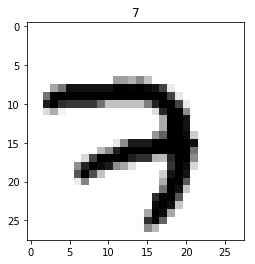

In [9]:
def display_digit(index):
    label = trainY[index].argmax(axis=0)
    image = trainX[index].reshape([28,28])
    plt.title(label)
    plt.imshow(image, cmap='gray_r')
    
display_digit(0)

In [20]:
testX.shape

(10000, 784)

### Build neural network
* Build input layer - number of features - 28 X 28
* Build hidden layer - Layers for feature identification
* Build output layer - Predict the label of given image

In [17]:
#creating a input layer of 100 features
#net = tflearn.input_data([None, 100]) 

#Adding layers
#n_units = 32
#This adds fully connected layer where every unit in the previous layer is connected to each unit of this layer
#net = tflearn.fully_connected(net, n_units, activation='ReLU')

#net = tflearn.regression(net, optimizer='sgd', learning_rate=0.1, loss='categorical_cross_entropy')

In [23]:
def build_model():
    tf.reset_default_graph()
    
    #Inputs
    net = tflearn.input_data([None, trainX.shape[1]])
    
    #Hidden layers
    net = tflearn.fully_connected(net, 128, activation='ReLU')
    net = tflearn.fully_connected(net, 32, activation='ReLU')
    
    #Output Layer & training model
    #activation for output layer is softmax
    #
    net = tflearn.fully_connected(net,10, activation='softmax')
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
    
    model = tflearn.DNN(net)
    return model

In [24]:
model = build_model()

In [25]:
model.fit(trainX,trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=100)

Training Step: 49499  | total loss: 0.05589 | time: 7.747s
| SGD | epoch: 100 | loss: 0.05589 - acc: 0.9847 -- iter: 49400/49500
Training Step: 49500  | total loss: 0.05358 | time: 9.015s
| SGD | epoch: 100 | loss: 0.05358 - acc: 0.9853 | val_loss: 0.10768 - val_acc: 0.9647 -- iter: 49500/49500
--


In [33]:
pred = np.argmax(model.predict(testX),axis=1)


In [42]:
act = np.argmax(testY,axis=1)

In [44]:
sum(pred == act)

9715

<module 'tflearn.layers' from 'C:\\Users\\ZekeLabs\\Anaconda3-N\\lib\\site-packages\\tflearn\\layers\\__init__.py'>

In [5]:
help(tflearn.fully_connected)

Help on function fully_connected in module tflearn.layers.core:

fully_connected(incoming, n_units, activation='linear', bias=True, weights_init='truncated_normal', bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, reuse=False, scope=None, name='FullyConnected')
    Fully Connected.
    
    A fully connected layer.
    
    Input:
        (2+)-D Tensor [samples, input dim]. If not 2D, input will be flatten.
    
    Output:
        2D Tensor [samples, n_units].
    
    Arguments:
        incoming: `Tensor`. Incoming (2+)D Tensor.
        n_units: `int`, number of units for this layer.
        activation: `str` (name) or `function` (returning a `Tensor`).
            Activation applied to this layer (see tflearn.activations).
            Default: 'linear'.
        bias: `bool`. If True, a bias is used.
        weights_init: `str` (name) or `Tensor`. Weights initialization.
            (see tflearn.initializations) Default: 'truncated_normal'.
     